# More toy datasets!
 - Build a classifier that classifies data generated from sklearn's ```make_circles``` function.
 - Feel free to use any of the code from the previous project, some stuff is already added to save time.

In [1]:
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import regularizers

np.set_printoptions(threshold=np.nan)

In [5]:
# These are some nicer settings to get things started.
# Increasing the noise increases how spread out the samples will be.
# Decreasing 'factor' increases the amount of separation between the radii of the circles.
num_samples = 500
X, y = sklearn.datasets.make_circles(n_samples=num_samples, noise=0.2, factor=0.3)

In [6]:
# Don't need to change anything here.
labels = np.zeros(X.shape)

for i in range(num_samples):
    labels[i, 0] = y[i]
    labels[i, 1] = 1. - y[i]

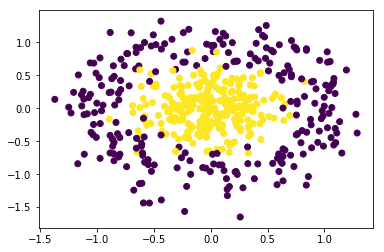

In [7]:
# Don't need to change anything here.
# The c parameter lets you assign class colors; assumes that 
# a row in X has the label referenced by the same row number
# of y.
scolors = ['red' if l > 0 else 'green' for l in y]
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [8]:
# Don't need to change anything here
def plot_decision_boundary(model, xmin=-2, xmax=3, ymin=-2, ymax=2):
    '''
    Given a Keras model trained on 2-class 2D data, this method plots the
    decision boundary and the regions belonging to either class.
    '''
    xl = np.linspace(xmin, xmax, 200)
    yl = np.linspace(ymin, ymax, 200)
    xv, yv = np.meshgrid(xl, yl)
    mesh_pred = np.zeros((200, 200))
    for i in range(200):
        for j in range(200):
            loc = np.zeros((1,2))
            loc[0,0] = xv[i, j]
            loc[0,1] = yv[i, j]
            #print(loc)
            #print(loc.shape)
            pred = model.predict(loc, batch_size=1)

            mesh_pred[i, j] = 1. if pred[0,0] > pred[0,1] else 0.
            
    plt.pcolor(xv, yv, mesh_pred)
    scolors = ['black' if l > 0 else 'white' for l in y]
    plt.scatter(X[:,0], X[:,1], c=scolors, s=10.)
    plt.draw()
    plt.show(block=False)

## Build your model!

In [9]:
num_features = X.shape[1]
num_labels = 2

In [10]:
model = Sequential()

In [11]:
model.add(Dense(100, input_dim=num_features, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [12]:
sgd = optimizers.SGD(lr=0.0001)

In [13]:
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(X, labels, batch_size=128, epochs=3000, verbose=0, validation_split=0.2)

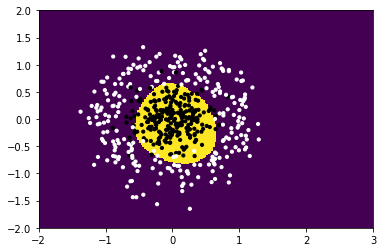

In [19]:
plot_decision_boundary(model=model)